In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Neural Network
import keras 
from keras.models import Sequential 
from keras.layers import Dense

In [2]:
# # Gathering and Establing the Data set from https://www.kaggle.com/competitions/titanic/data
titanic = pd.read_csv('train.csv')
survivor = pd.read_csv('test.csv')
df = titanic.append(survivor , ignore_index = True)

# analyzing the data
print(titanic.shape, survivor.shape, titanic.columns.values)

(891, 12) (418, 11) ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


C:\Users\jmval\AppData\Local\Temp\ipykernel_1472\3331746066.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = titanic.append(survivor , ignore_index = True)


In [3]:
# Preparing and analyzing the data
# check if there is any NAN
df['Pclass'].isnull().sum(axis=0)

0

In [4]:
# inspect the correlation between Pclass and Survived
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:>

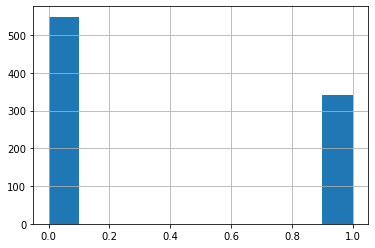

In [5]:
#Analyzing of the data
titanic['Survived'].hist() #histogram

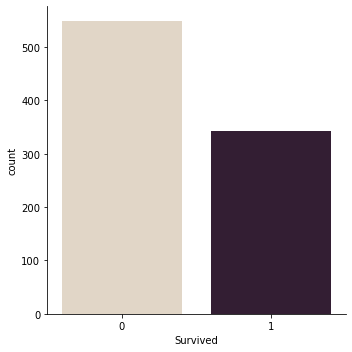

In [6]:
#Analyzing of the data
sns.catplot(x="Survived", kind="count", palette="ch:.25", data=titanic) #bar graph of survived

In [7]:
#Analyzing of the data
df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [8]:
#Analyzing of the data
df['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

# inspect the amount of people for each title
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [9]:
#taking care of the variable
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss') 
             & (df.Title !=  'Mrs')] = 'Others'

# inspect the correlation between Title and Survived
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

C:\Users\jmval\AppData\Local\Temp\ipykernel_1472\1346816986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss')


,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [10]:
# inspect the amount of people for each title
df['Title'].value_counts()

Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [11]:
df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1)

In [12]:
# check if there is any NAN
df.Sex.isnull().sum(axis=0)

0

In [13]:
# inspect the correlation between Sex and Survived
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# mapping of two genders 0 and 1
df.Sex = df.Sex.map({'male':0, 'female':1})

In [15]:
# checking of NAN
df.Age.isnull().sum(axis=0)

263

In [16]:
# checking of NAN
df.SibSp.isnull().sum(axis=0), df.Parch.isnull().sum(axis=0)

(0, 0)

In [17]:
# create a new feature "Family"
df['Family'] = df['SibSp'] + df['Parch'] + 1

# inspect the correlation between Family and Survived
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [18]:
# family size counts
df['Family'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [19]:
#analyzing data of family and survived percentage
df.Family = df.Family.map(lambda x: 0 if x > 4 else x)
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.161290
1,1,0.303538
2,2,0.552795
3,3,0.578431
4,4,0.724138


In [20]:
df['Family'].value_counts()

1    790
2    235
3    159
0     82
4     43
Name: Family, dtype: int64

In [21]:
# check if there is any NAN
df.Ticket.isnull().sum(axis=0)

df.Ticket = df.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

# inspect the amount of people for each type of tickets
df['Ticket'].value_counts()

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket, dtype: int64

In [22]:
df[['Ticket', 'Fare']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare
0,1,65.771211
1,2,20.235194
2,3,15.380682
3,4,16.764036
4,5,19.262500
5,6,19.153711
6,7,9.197438
7,8,8.397900
8,9,7.750000
9,A,10.189681


In [23]:
df[['Ticket', 'Pclass']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Pclass
0,1,1.147619
1,2,2.309353
2,3,2.904429
3,4,3.000000
4,5,2.333333
5,6,2.111111
6,7,3.000000
7,8,3.000000
8,9,3.000000
9,A,3.000000


In [24]:
# check if there is any NAN
df.Fare.isnull().sum(axis=0)

1

In [25]:
df.Cabin[df.Fare.isnull()]
df.Pclass[df.Fare.isnull()]
df.Ticket[df.Fare.isnull()]
df.Embarked[df.Fare.isnull()]

1043    S
Name: Embarked, dtype: object

In [26]:
# divide the standard deviation by the mean. A lower ratio means a tighter 
# distribution of Fare in each Ticket type
df[['Ticket', 'Fare']].groupby(['Ticket']).std() /  df[['Ticket', 'Fare']].groupby(['Ticket']).mean()

,Fare
Ticket,
1,0.817411
2,1.284139
3,1.351244
4,0.497578
5,0.284367
6,0.735873
7,0.080078
8,0.005961
9,0.000000


In [27]:
# divide the standard deviation by the mean. A lower ratio means a tighter 
# distribution of Fare in each Embarked
df[['Embarked', 'Fare']].groupby(['Embarked']).std() /  df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,1.350514
Q,1.097278
S,1.352954


In [28]:
guess_Fare = df.Fare.loc[ (df.Ticket == '3') & (df.Pclass == 3) & (df.Embarked == 'S')].median()
df.Fare.fillna(guess_Fare , inplace=True)

# inspect the mean Fare values for people who died and survived
df[['Fare', 'Survived']].groupby(['Survived'],as_index=False).mean()

,Survived,Fare
0,0.0,22.117887
1,1.0,48.395408


In [29]:
# five intervals of equal amount of people
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

# analyzing the data between fare-bin and survived
df[['Fare-bin', 'Survived']].groupby(['Fare-bin'], as_index=False).mean()

,Fare-bin,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


In [30]:
# check if there is any NAN
df.Cabin.isnull().sum(axis=0)

1014

In [31]:
df = df.drop(labels=['Cabin'], axis=1)

In [32]:
# check if there is any NAN
df.Embarked.isnull().sum(axis=0)

2

In [33]:
df.Embarked.fillna('S' , inplace=True )

In [34]:
df[['Embarked', 'Survived','Pclass','Fare', 'Age', 'Sex']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived,Pclass,Fare,Age,Sex
0,C,0.553571,1.851852,62.336267,32.332170,0.418519
1,Q,0.389610,2.894309,12.409012,28.630000,0.487805
2,S,0.339009,2.344978,27.512485,29.298151,0.319869


In [35]:
df = df.drop(labels='Embarked', axis=1)

In [36]:
df[['Fare-bin', 'Age']].groupby(['Fare-bin']).mean()

,Age
Fare-bin,
1,27.848315
2,27.898241
3,26.144009
4,30.728604
5,35.877913


In [37]:
#Preparing the data
# Taking care of NaN
df_sub = df[['Age','Master','Miss','Mr','Mrs','Others','Fare-bin','SibSp']]

X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()
X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test),1)
df.Age.loc[df.Age.isnull()] = y_pred

df.Age.isnull().sum(axis=0) 

C:\Users\jmval\AppData\Local\Temp\ipykernel_1472\2170334250.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age.loc[df.Age.isnull()] = y_pred


0

In [38]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary
age_index = (1,2,3,4,5,6,7) #('baby','child','teenager','young','mid-age','over-50','senior')
df['Age-bin'] = pd.cut(df.Age, bins, labels=age_index).astype(int)

df[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()

,Age-bin,Survived
0,1,0.675000
1,2,0.452381
2,3,0.402597
3,4,0.315789
4,5,0.427083
5,6,0.375000
6,7,0.125000


In [39]:
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()
df['Ticket'].value_counts()
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# check the correlation again
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [40]:
# dummy encoding
df = pd.get_dummies(df,columns=['Ticket'])

In [41]:
# splitting dataset into train and test
df = df.drop(labels=['SibSp','Parch','Age','Fare','Title'], axis=1)
y_train = df[0:891]['Survived'].values
X_train = df[0:891].drop(['Survived','PassengerId'], axis=1).values
X_test  = df[891:].drop(['Survived','PassengerId'], axis=1).values

In [42]:
# define the keras model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(12, input_shape=(8,), activation='relu')) #we use input shape as (8,) because there are 8 features that we need
model.add(Dense(8, activation='relu')) #this is the hidden layer
model.add(Dense(1, activation='sigmoid')) #this is the output layer (1 output for classification in this case)


In [43]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
#Training of the datasets
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
90/90 [==============================] - 1s 1ms/step - loss: 0.6092 - accuracy: 0.6869
Epoch 2/150
90/90 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7666
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7991
Epoch 4/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.8036
Epoch 5/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8081
Epoch 6/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8193
Epoch 7/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8159
Epoch 8/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8249
Epoch 9/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8316
Epoch 10/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8283
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8361
Epoch 83/150
90/90 [==============================] - 0s 989us/step - loss: 0.3739 - accuracy: 0.8462
Epoch 84/150
90/90 [==============================] - 0s 989us/step - loss: 0.3773 - accuracy: 0.8406
Epoch 85/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8395
Epoch 86/150
90/90 [==============================] - 0s 989us/step - loss: 0.3737 - accuracy: 0.8361
Epoch 87/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8373
Epoch 88/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8462
Epoch 89/150
90/90 [==============================] - 0s 989us/step - loss: 0.3740 - accuracy: 0.8361
Epoch 90/150
90/90 [==============================] - 0s 989us/step - loss: 0.3758 - accuracy: 0.8328
Epoch 91/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8429
Epo

In [45]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

14/14 [==============================] - 0s 846us/step


In [46]:
output = pd.DataFrame({'PassengerId': survivor['PassengerId'], 'Survived': y_final})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

28/28 [==============================] - 0s 889us/step - loss: 0.3537 - accuracy: 0.8507
Accuracy: 85.07


In [48]:
#Choosing the model which is KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#Training of the model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
#evaluation of the model
accu_knn = round(knn.score(X_train, y_train) * 100, 2)
print("accuracy :", accu_knn)

accuracy : 86.42


In [49]:
#Choosing the model which is LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
#training of the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred2 = log_reg.predict(X_test)
#Evaluation of the model
accu_logis = round(log_reg.score(X_train, y_train) * 100, 2)
print("accuracy :", accu_logis)

accuracy : 82.94


In [50]:
#Hyperparameter Tuning
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [51]:
#Predicting
survivor = pd.read_csv('test.csv',encoding='latin-1')
z = survivor["Name"].values

In [ ]:
#Comparison
#the logistic regression model  seems to be the not the best model out of the 3. the accuracy of 82.94 is a pretty good score for the Titanic dataset.
#the knn model seems to be the best model out of the 3 while having the accuracy of 86.42% of predicting survivor
#the keras model is in the middle of the 3 while having an accuracy of 85.07

In [ ]:
#Analysis
#visually inspect the head of the dataset,Examine the train dataset to understand in particular if the data is tidy, shape of the dataset,examine datatypes, examine missing values, unique counts and build a data dictictionary dataframe. Always use the 7 steps of machine learning. 

In [ ]:
#conclusion
#We started our experiment by examining the dataset, posing queries, and then using mining and visualization to discover solutions. We normalized the data, created a few new features, processed missing values properly, and replaced them. Using dummy variables, we converted the category variables as well. The best model was then developed after we generated a number of machine learning models and compared them. 